In [1]:
import numpy as np
import sys
project_directory = '/Users/franciscobrito/projects/'
sys.path.append(project_directory + 'tmd-nanoribbon/mean-field/src/lib')
from lib.lib_tmd_model import setParams
from lib.lib_solvers import solve_self_consistent_k_space_2sublat
from lib.lib_init_cond import *
from lib.lib_plot import showBandStructure, showHalfBandStructure, showGrandpotentialMinimization,\
showMagProf2sublat, showWF

# Set the desired parameters

tmd : choose the TMD (MoS2, WS2, MoSe2, WSe2, MoTe2, WTe2)

Nk : Number of ks

Ny : Number of atoms along the transverse direction

nHole : Density of holes (to study a hole-doped system)

invTemp : Inverse temperature (if we set it very high, we get T = 0)

betaStart : Inverse temperature at which the annealing starts

betaSpeed : This parameter (> 1) regulates the speed of the annealing

betaThreshold: The point at which annealing stops (and after which we jump to the desired temperature - maybe zero!)

U : On-site interaction

itMax : Maximum allowed number of iterations

dyn : 'kick' (random small deviation), 'local' (local update), 'mixed' (both), 'wait' (both, waiting for a while)

singleExcitationFreq : How often to shake up the Markovian dynamics

osc : Oscillations in the annealing scheme

dampFreq : Frequency of the damping

delta : Tolerance for updated densities convergence

nUp, nDown = ferro(...) : Initial condition

In [40]:
# Number of orbitals in the model
nOrb = 3

# Number of k-points
Nk = 512

# Dimensions of the ribbon
Ny = 4

# Model parameters
t = 1
U = 16

# Choose TMD
tmd = 'MoS2'
abs_t0, e1, e2, t0, t1, t2, t11, t12, t22, \
E0, E1, E2, E3, E4, E5, E6 = setParams(tmd)

# For a hole-doped system (0 means no holes)
nHole = 0

# Self-explanatory
anneal_or_not = True
osc = False

# Inverse temperature and annealing parameters
invTemp = 1
betaStart = 0.02
betaSpeed = 1.12
betaThreshold = 20

# Solver parameters
itMax = 50
dampFreq = 1
delta = 1e-6
singleExcitationFreq = itMax # in this case it doesn't matter
dyn = 'mixed'

# Initial conditions
seed = 124190212
nUp, nDown = antiferro_along_row(2 / 3, Ny, nOrb)

# Show initial condition

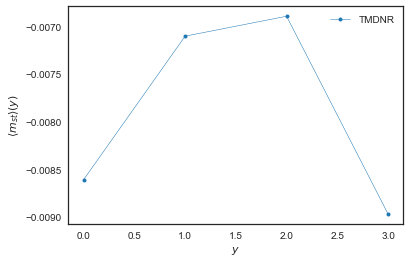

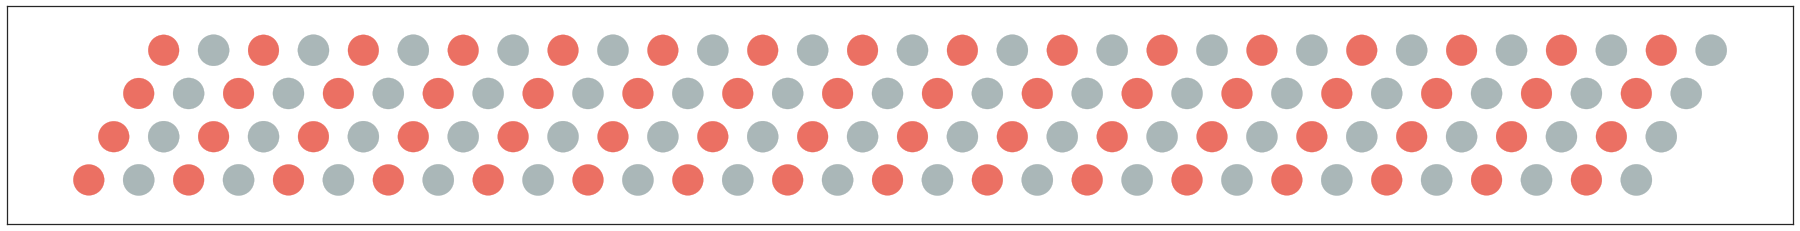

In [41]:
dotscale = 15
longLength = 32
showMagProf2sublat(nUp, nDown, Ny, nOrb, dotscale, longLength)

# Iterative mean field solution

In [42]:
%%time

nUp, nDown, energies,\
lastGrandpotential, itSwitch, lastIt, mu, abs_t0,\
eUp, eDown, wfUp, wfDown\
= solve_self_consistent_k_space_2sublat\
(abs_t0, E0, E1, E2, E3, E4,\
Nk, Ny, nOrb, nHole, invTemp, betaStart,\
betaSpeed, betaThreshold, anneal_or_not, U, itMax, dampFreq, dyn, singleExcitationFreq,\
osc, delta, nUp, nDown)


Started annealing.

Inverse temperature:  0.020000000000000018
iteration:  0
deltaUp:  0.109454006165
deltaDown:  0.106788033629
Inverse temperature:  0.14000000000000012
Inverse temperature:  0.2744000000000002
Inverse temperature:  0.4249280000000004
Inverse temperature:  0.5935193600000006
Inverse temperature:  0.7823416832000007
Inverse temperature:  0.9938226851840011
Inverse temperature:  1.2306814074060815

Finished annealing.

iteration:  10
deltaUp:  0.000119853825112
deltaDown:  0.000154550022575
iteration:  20
deltaUp:  1.3900659218e-05
deltaDown:  1.84831002232e-05
iteration:  30
deltaUp:  2.70133947376e-06
deltaDown:  3.9621064271e-06
CPU times: user 9.13 s, sys: 53.3 ms, total: 9.18 s
Wall time: 9.26 s


# Band structure

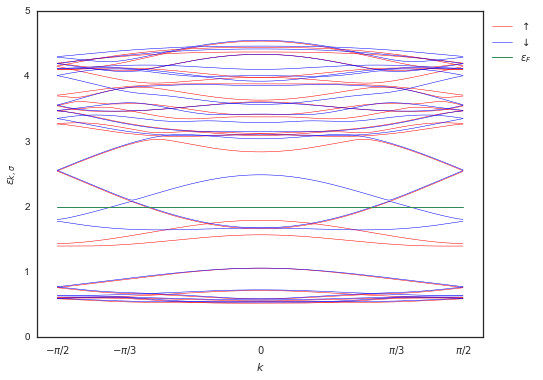

In [43]:
showHalfBandStructure(Nk, abs_t0, eUp, eDown, mu)

# Show solution

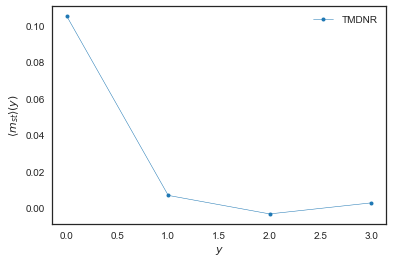

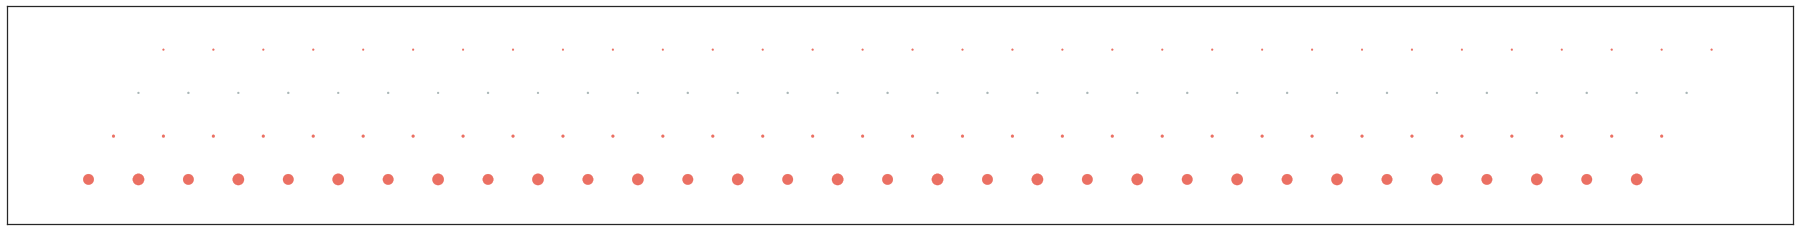

In [44]:
dotscale = 12
longLength = 32
showMagProf2sublat(nUp[::-1], nDown[::-1], Ny, nOrb, dotscale, longLength)

# Grandpotential minimization

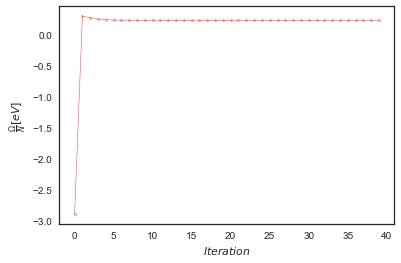

In [45]:
showGrandpotentialMinimization(itSwitch, lastIt, energies)

In [46]:
lastGrandpotential

0.23901527906831732